In [1]:
import csv
import pandas as pd
import os
import re
import math
from zipfile import ZipFile
import itertools
import matplotlib.pyplot as plt
import numpy as np


directory = os.getcwd()
file_name = "2015_labeled_dataset.zip"
csv_file_directory = directory + "/articles_2015_reduced.csv"
all_articles = (pd.read_csv(csv_file_directory, usecols = ["article_id"])).values.tolist()
all_ressorts = (pd.read_csv(csv_file_directory, usecols = ["ressort"])).values.tolist()
all_titles = (pd.read_csv(csv_file_directory, usecols = ["title"])).values.tolist()
all_authors = (pd.read_csv(csv_file_directory, usecols = ["authors"])).values.tolist()
all_subtitles = (pd.read_csv(csv_file_directory, usecols = ["subtitle"])).values.tolist()


translated_csv_file_directory = directory + "/articles_2015_translated.csv"
all_characters = (pd.read_csv(translated_csv_file_directory, usecols = ["characters"])).values.tolist()
all_dates = (pd.read_csv(translated_csv_file_directory, usecols = ["date"])).values.tolist()


with ZipFile(file_name, 'r') as zip:
    all_files = list(zip.namelist())


num_of_files = len(all_articles)

ressort_dict = {}
for file_themes in all_ressorts:
    for theme in file_themes:
        try:
            theme = theme.lower()
        except:
            theme = theme
        if theme not in ressort_dict.keys():
            ressort_dict[theme] = 1
        else:
            val = ressort_dict[theme]
            val+=1
            ressort_dict[theme] = val

In [2]:
# The code underneath here visualizes the distribution of ressorts from all the files in the labelled dataset

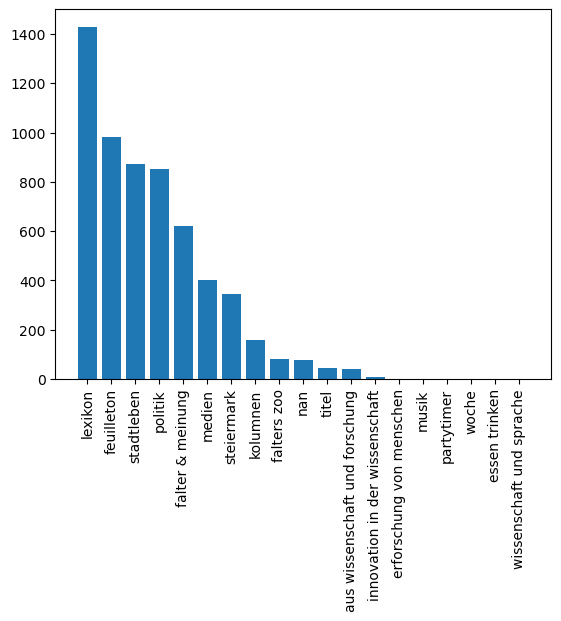

In [3]:
sorted_dict= dict(sorted(ressort_dict.items(), key=lambda item: item[1]))
sorted_dict = dict(reversed(list(sorted_dict.items())))

names = list(sorted_dict.keys())
values = list(sorted_dict.values())

plt.bar(range(len(sorted_dict)), values, tick_label=names)
plt.xticks(rotation=90, ha='center')
plt.show()

In [4]:
# The code underneath here shows the distribution of all "ressorts" from the x best recommendation
# from all of the query_files.

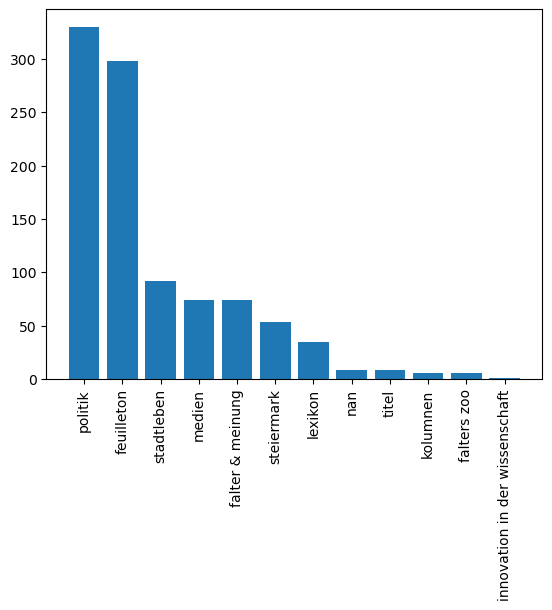

In [5]:
x = 5

all_top_rec_files = []
for query_file in all_files:
    rec_files = pd.read_csv(query_file, header = None)
    rec_files = rec_files.values.tolist()
    i = 0
    while i < x:
        this_file = str(rec_files[i])
        this_file = this_file.replace("\\", ""); this_file = this_file.replace("['", ""); this_file = this_file.replace("']", "")
        this_file = this_file.split("t")
        all_top_rec_files.append(this_file[0])
        i+=1

all_top_rec_indexes = []
for article_id in all_top_rec_files:
    for i in range(len(all_articles)):
        this_article = "".join(all_articles[i])
        if article_id == this_article:
            all_top_rec_indexes.append(all_ressorts[i])
            break


all_top_rec_ressorts = {}
for file_themes in all_top_rec_indexes:
    for theme in file_themes:
        try:
            theme = theme.lower()
        except:
            theme = theme
        if theme not in all_top_rec_ressorts.keys():
            all_top_rec_ressorts[theme] = 1
        else:
            val = all_top_rec_ressorts[theme]
            val+=1
            all_top_rec_ressorts[theme] = val

sorted_dict= dict(sorted(all_top_rec_ressorts.items(), key=lambda item: item[1]))
sorted_dict = dict(reversed(list(sorted_dict.items())))

names = list(sorted_dict.keys())
values = list(sorted_dict.values())

plt.bar(range(len(sorted_dict)), values, tick_label=names)
plt.xticks(rotation=90, ha='center')
plt.show()

In [6]:
x = 5

ressort_dict = {}

for query_file in all_files:
    query_file = query_file.replace("2015_labeled_dataset/", ""); query_file = query_file.replace(".csv","")
    for i in range(len(all_articles)):
        this_article = str(all_articles[i])
        this_article = this_article.replace("['",""); this_article = this_article.replace("']", "")
        if query_file == this_article:
            query_index = i
            break
    query_ressort = all_ressorts[i]
    query_ressort = str(query_ressort)
    query_ressort = query_ressort.replace("['", ""); query_ressort = query_ressort.replace("']", "")
    theme = query_ressort.lower()
    
    if theme not in ressort_dict.keys():
        ressort_dict[theme] = 1
    else:
        val = ressort_dict[theme]
        val+=1
        ressort_dict[theme] = val
    
print(f"Total amount of query files: {len(all_files)}")

print(f"Dictionary of all query file ressorts/themes:\n{ressort_dict}")
            
            


Total amount of query files: 197
Dictionary of all query file ressorts/themes:
{'politik': 64, 'feuilleton': 78, 'medien': 17, 'falter & meinung': 11, 'stadtleben': 23, 'lexikon': 4}


In [7]:
def make_dicts(ressort_dict, all_top_rec_indexes):
    for file_themes in all_top_rec_indexes:
        for theme in file_themes:
            try:
                theme = theme.lower()
            except:
                theme = theme
            if theme not in ressort_dict.keys():
                ressort_dict[str(theme)] = int(1)
            else:
                val = ressort_dict[theme]
                val+=1
                ressort_dict[str(theme)] = int(val)
    return ressort_dict

Text(0.5, 0.98, 'Recommended ressorts based on query ressort')

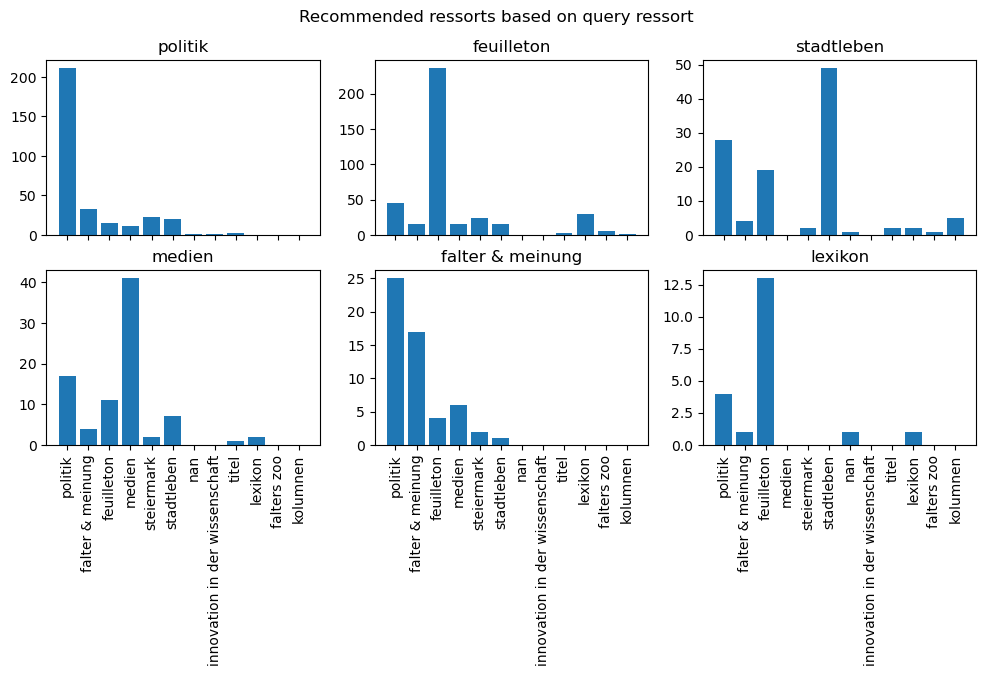

In [8]:
x = 5

politik_dict = {}
feuilleton_dict = {}
stadtleben_dict = {}
medien_dict = {}
falter_und_meinung_dict = {}
lexikon_dict = {}

for query_file in all_files:
    rec_files = pd.read_csv(query_file, header = None)
    rec_files = rec_files.values.tolist()
    query_file = query_file.replace("2015_labeled_dataset/", ""); query_file = query_file.replace(".csv","")
    for i in range(len(all_articles)):
        this_article = str(all_articles[i])
        this_article = this_article.replace("['",""); this_article = this_article.replace("']", "")
        if query_file == this_article:
            query_index = i
            break
            
    query_ressort = all_ressorts[i]
    query_ressort = str(query_ressort)
    query_ressort = query_ressort.replace("['", ""); query_ressort = query_ressort.replace("']", "")
    theme = query_ressort.lower()
    
    all_top_rec_files = []
    i = 0
    while i < x:
        this_file = str(rec_files[i])
        this_file = this_file.replace("\\", ""); this_file = this_file.replace("['", ""); this_file = this_file.replace("']", "")
        this_file = this_file.split("t")
        all_top_rec_files.append(this_file[0])
        i+=1

    all_top_rec_indexes = []
    for article_id in all_top_rec_files:
        for i in range(len(all_articles)):
            this_article = "".join(all_articles[i])
            if article_id == this_article:
                all_top_rec_indexes.append(all_ressorts[i])
                break
                
    if theme == "politik":
        politik_dict = make_dicts(politik_dict, all_top_rec_indexes)
    elif theme == "feuilleton":
        feuilleton_dict = make_dicts(feuilleton_dict, all_top_rec_indexes)
    elif theme == "stadtleben":
        stadtleben_dict = make_dicts(stadtleben_dict, all_top_rec_indexes)
    elif theme == "medien":
        medien_dict = make_dicts(medien_dict, all_top_rec_indexes)
    elif theme == "falter & meinung":
        falter_und_meinung_dict = make_dicts(falter_und_meinung_dict, all_top_rec_indexes)
    elif theme == "lexikon":
        lexikon_dict = make_dicts(lexikon_dict, all_top_rec_indexes)
    

fig, axs = plt.subplots(2, 3, figsize=(12, 5), sharex = True)


axs[0,0].bar(list(politik_dict.keys()), list(politik_dict.values()))
axs[0,0].set_title("politik")
plt.sca(axs[0, 0])
plt.xticks(rotation=90, ha='center')

axs[0,1].bar(list(feuilleton_dict.keys()), list(feuilleton_dict.values()))
axs[0,1].set_title("feuilleton")
plt.sca(axs[0, 1])
plt.xticks(rotation=90, ha='center')

axs[0,2].bar(list(stadtleben_dict.keys()), list(stadtleben_dict.values()))
axs[0,2].set_title("stadtleben")
plt.sca(axs[0, 2])
plt.xticks(rotation=90, ha='center')

axs[1,0].bar(list(medien_dict.keys()), list(medien_dict.values()))
axs[1,0].set_title("medien")
plt.sca(axs[1, 0])
plt.xticks(rotation=90, ha='center')

axs[1,1].bar(list(falter_und_meinung_dict.keys()), list(falter_und_meinung_dict.values()))
axs[1,1].set_title("falter & meinung")
plt.sca(axs[1, 1])
plt.xticks(rotation=90, ha='center')

axs[1,2].bar(list(lexikon_dict.keys()), list(lexikon_dict.values()))
axs[1,2].set_title("lexikon")
plt.sca(axs[1, 2])
plt.xticks(rotation=90, ha='center')

fig.suptitle('Recommended ressorts based on query ressort')

    

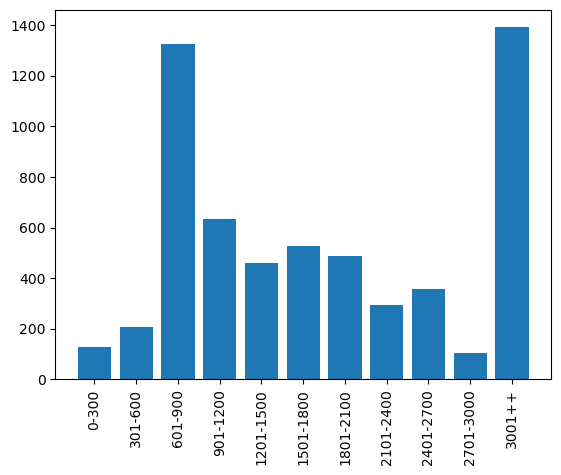

In [9]:
characters_dict = {
    "0-300" : 0,
    "301-600" : 0,
    "601-900" : 0,
    "901-1200" : 0,
    "1201-1500" : 0,
    "1501-1800" : 0,
    "1801-2100" : 0,
    "2101-2400" : 0,
    "2401-2700" : 0,
    "2701-3000" : 0,
    "3001++" : 0
}

for characters in all_characters:
    characters = str(characters)
    characters = characters.replace("[", ""); characters = characters.replace("]", "")
    characters = int(characters)
    if 0<= characters <= 300:
        characters_dict["0-300"] +=1
    elif 301<= characters <= 600:
        characters_dict["301-600"] += 1
    elif 601<= characters <= 900:
        characters_dict["601-900"] += 1
    elif 901<= characters <= 1200:
        characters_dict["901-1200"] += 1
    elif 1201<= characters <= 1500:
        characters_dict["1201-1500"] += 1
    elif 1501<= characters <= 1800:
        characters_dict["1501-1800"] += 1
    elif 1801<= characters <= 2100:
        characters_dict["1801-2100"] += 1
    elif 2101<= characters <= 2400:
        characters_dict["2101-2400"] += 1
    elif 2401<= characters <= 2700:
        characters_dict["2401-2700"] += 1
    elif 2701<= characters <= 3000:
        characters_dict["2701-3000"] += 1
    elif 3001<= characters:
        characters_dict["3001++"] += 1
        
names = list(characters_dict.keys())
values = list(characters_dict.values())
    
plt.bar(range(len(characters_dict)), values, tick_label=names)
plt.xticks(rotation=90, ha='center')
plt.show()